# Steric optimization for the North Sea

In [57]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import SeaLevelContrib as slc

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [59]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '../code/SeaLevelContrib.py'>

In [4]:
data_path = '../outputs/'

In [6]:
b_df = pd.read_csv(f'{data_path}slbudget_2021_12_06_NS_Fred16_1950_2020_ERA5StericIAP_500m.csv')
b_df = b_df.set_index('time')

In [7]:
b_df

,Total,LocSteric,GloSteric,GIA,Glaciers,Antarctica,Greenland,TWS,Nodal,Wind,Pressure,Obs
time,,,,,,,,,,,,
1950,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.902359
1951,-4.146598,-3.460850,0.097124,0.00525,0.048333,0.005000,-0.001250,0.290417,0.008253,-1.193756,0.054880,0.702359
1952,-2.481783,-2.161335,0.176444,0.01050,0.107500,0.010417,-0.002083,0.284167,-0.054336,-0.414208,-0.438848,2.012359
1953,-4.142491,-1.704739,0.177486,0.01575,0.172083,0.015000,-0.001667,0.276667,-0.180699,-0.374800,-2.537571,0.772359
1954,0.662590,-0.463084,0.193522,0.02100,0.222917,0.020417,-0.002500,0.165833,-0.356571,0.711085,0.149971,1.392359
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1.733211,-2.556120,4.680546,0.34650,2.369583,0.850000,-0.042917,-0.073750,-1.249658,-1.040441,-1.550532,8.854070
2017,6.176883,-1.279697,4.838131,0.35175,2.434167,0.865000,-0.042500,-0.545000,-1.196393,1.418693,-0.667268,12.391570
2018,1.033709,-1.990038,4.889651,0.35700,2.451250,0.975000,-0.035000,-0.685417,-1.077951,-2.022615,-1.828171,7.110848


In [26]:
st = slc.StericSL(500, 'ENS', 'IAP')
st = st.loc[1950:] - st.loc[1950]
st

,Steric
time,
1950,0.000000
1951,-3.363726
1952,-1.984891
1953,-1.527254
1954,-0.269562
...,...
2016,2.124426
2017,3.558434
2018,2.899613


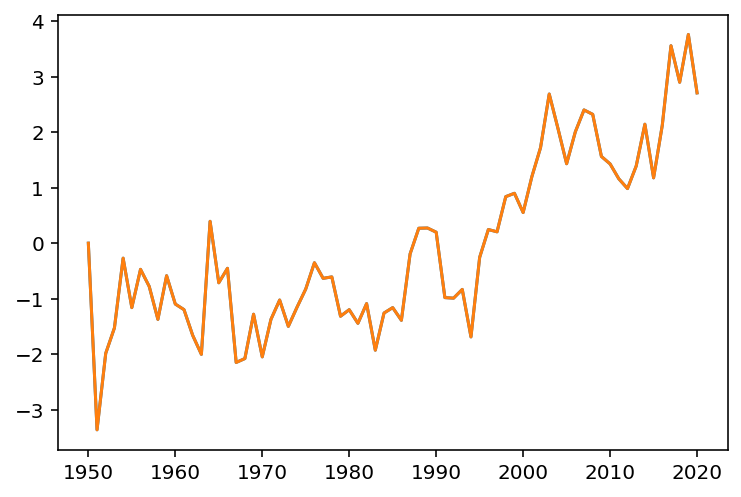

In [27]:
plt.plot(b_df['LocSteric']+b_df['GloSteric'])
plt.plot(st)

In [31]:
nt = b_df.loc[:,'GIA':'Pressure'].sum(axis=1) + st.Steric
nt

time
1950    0.000000
1951   -4.146598
1952   -2.481783
1953   -4.142491
1954    0.662590
          ...   
2016    1.733211
2017    6.176883
2018    1.033709
2019    5.418139
2020    6.953814
Length: 71, dtype: float64

In [30]:
b_df.Total

time
1950    0.000000
1951   -4.146598
1952   -2.481783
1953   -4.142491
1954    0.662590
          ...   
2016    1.733211
2017    6.176883
2018    1.033709
2019    5.418139
2020    6.953814
Name: Total, Length: 71, dtype: float64

In [34]:
lowess = sm.nonparametric.lowess
frac = window/data_df.shape[0]
trend_df['trend_line'] = lowess(data_df, data_df.index, frac, return_sorted=False)

'Normalised RMSE (cm): 0.18\nNormalised AE (cm): 1.2'

### One layer model

In [78]:
window = 7
    
depth_range = np.arange(50,2050,50)

error_df = pd.DataFrame(columns=['Depth', 'RMSE', 'AE'])
error_df['Depth'] = depth_range
error_df = error_df.set_index('Depth')

if window > 1:
    smoothing = True
    frac = window/error_df.shape[0]
else:
    smoothing = False

for d in depth_range:
    print(d)
    st = slc.StericSL(0, d, 'ENS', 'IAP')
    st = st.loc[1950:] - st.loc[1950]
    if smoothing:
        st['Steric'] = lowess(st['Steric'], st.index, frac, return_sorted=False)
    nt = b_df.loc[:,'GIA':'Pressure'].sum(axis=1) + st.Steric
    diff_df = b_df.Obs - nt
    diff_df = diff_df - diff_df.mean()
    RMSE = np.sqrt( (diff_df**2).sum() ) / len(diff_df)
    AE = np.abs(diff_df).sum() / len(diff_df)
    error_df.loc[d] = [RMSE, AE]

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000


In [70]:
st['Steric']

time
1950    0.000000
1951   -0.429071
1952   -0.335204
1953   -0.040911
1954   -0.191250
          ...   
2016    0.601032
2017    0.692775
2018    0.269103
2019    0.420293
2020    0.312664
Name: Steric, Length: 71, dtype: float64

### Two layer model

In [86]:
windows = np.array([5, 15])
    
depth_range = np.arange(50,2050,50)

error_df = pd.DataFrame(columns=['Depth', 'RMSE', 'AE'])
error_df['Depth'] = depth_range
error_df = error_df.set_index('Depth')

smoothing = True
frac = windows/error_df.shape[0]

for d in depth_range:
    print(d)
    
    st1 = slc.StericSL(0, d, 'ENS', 'IAP')
    st1['Steric'] = lowess(st1['Steric'], st1.index, frac[0], return_sorted=False)
    
    st2 = slc.StericSL(d, 2000, 'ENS', 'IAP')
    st2['Steric'] = lowess(st2['Steric'], st2.index, frac[1], return_sorted=False)
    
    st = st1+st2
    st = st.loc[1950:] - st.loc[1950]

    nt = b_df.loc[:,'GIA':'Pressure'].sum(axis=1) + st.Steric
    diff_df = b_df.Obs - nt
    diff_df = diff_df - diff_df.mean()
    RMSE = np.sqrt( (diff_df**2).sum() ) / len(diff_df)
    AE = np.abs(diff_df).sum() / len(diff_df)
    error_df.loc[d] = [RMSE, AE]

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000


In [87]:
frac

array([0.125, 0.375])

### First results without smoothing

<AxesSubplot:xlabel='Depth'>

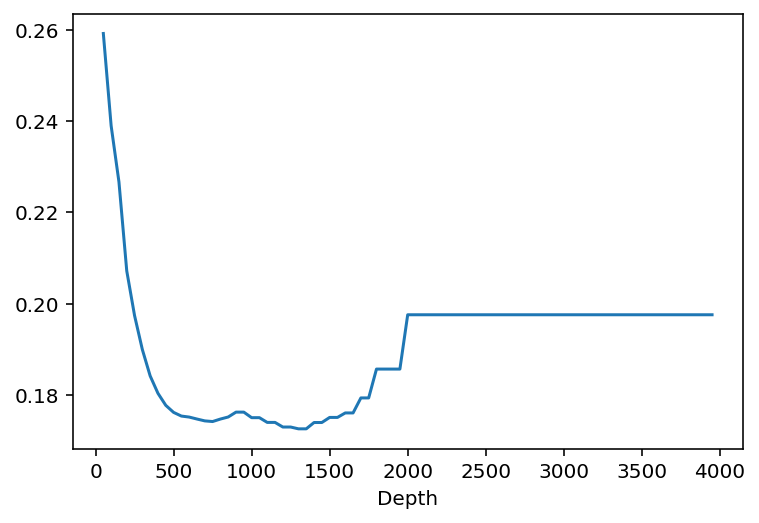

In [54]:
error_df['RMSE'].plot()


<AxesSubplot:xlabel='Depth'>

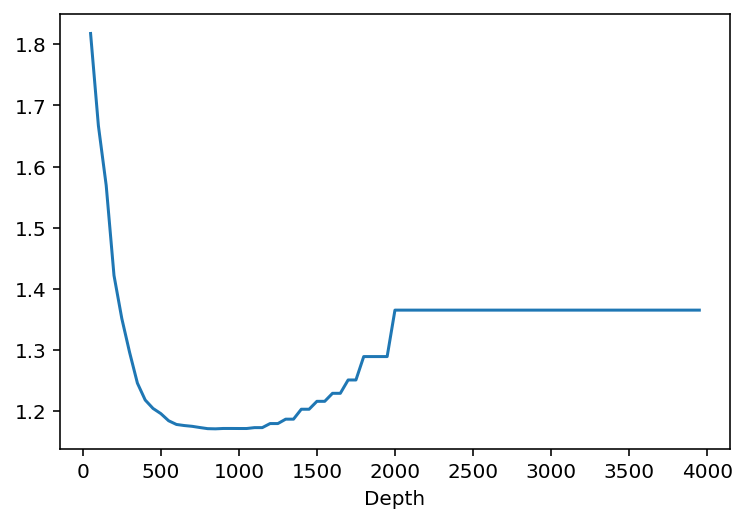

In [55]:
error_df['AE'].plot()

### Result with smoothing window of 3 y

<AxesSubplot:xlabel='Depth'>

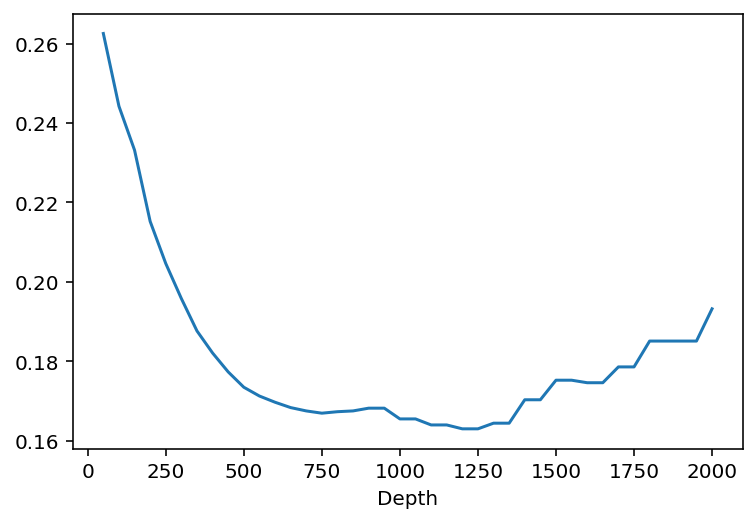

In [73]:
error_df['RMSE'].plot()

<AxesSubplot:xlabel='Depth'>

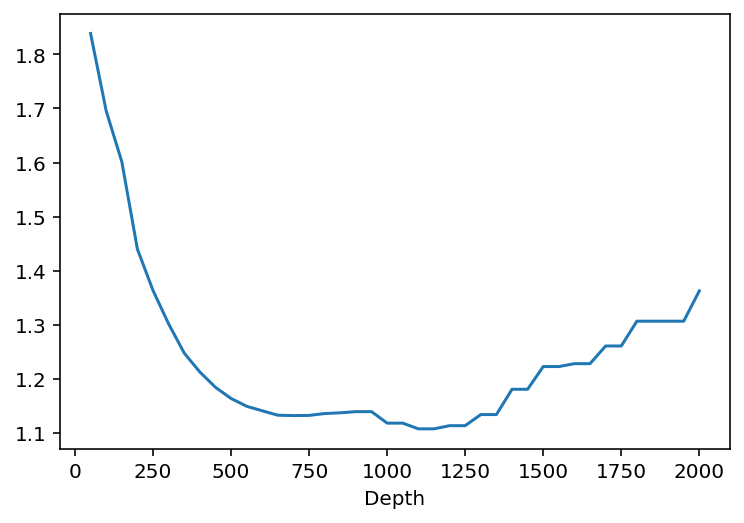

In [74]:
error_df['AE'].plot()

### Smoothing window is 5 years

<AxesSubplot:xlabel='Depth'>

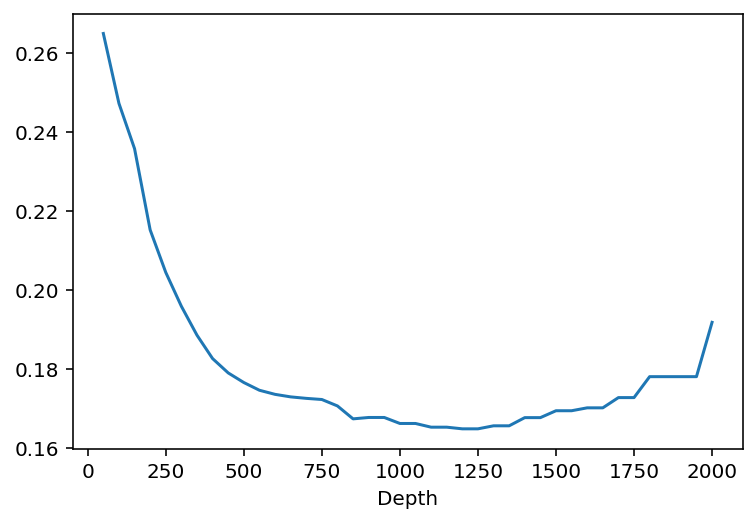

In [76]:
error_df['RMSE'].plot()

<AxesSubplot:xlabel='Depth'>

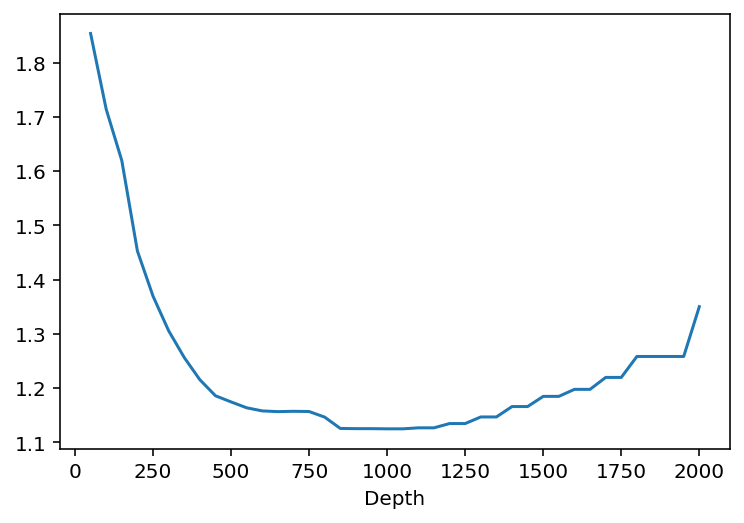

In [77]:
error_df['AE'].plot()

### Smoothing 7 years

<AxesSubplot:xlabel='Depth'>

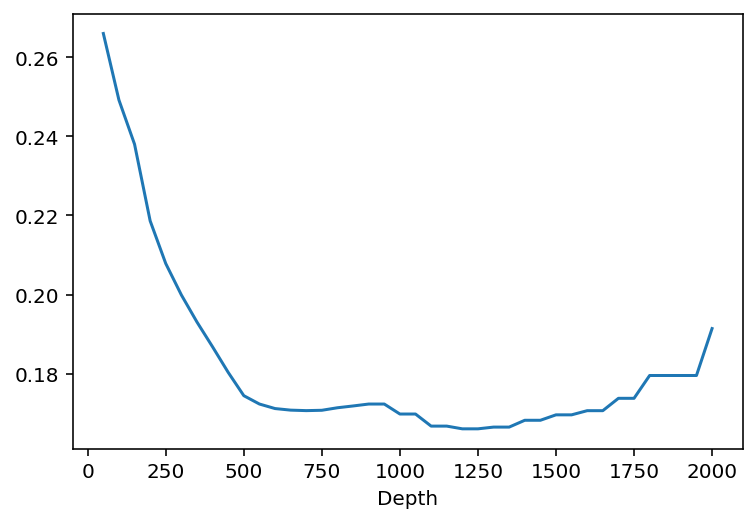

In [79]:
error_df['RMSE'].plot()

<AxesSubplot:xlabel='Depth'>

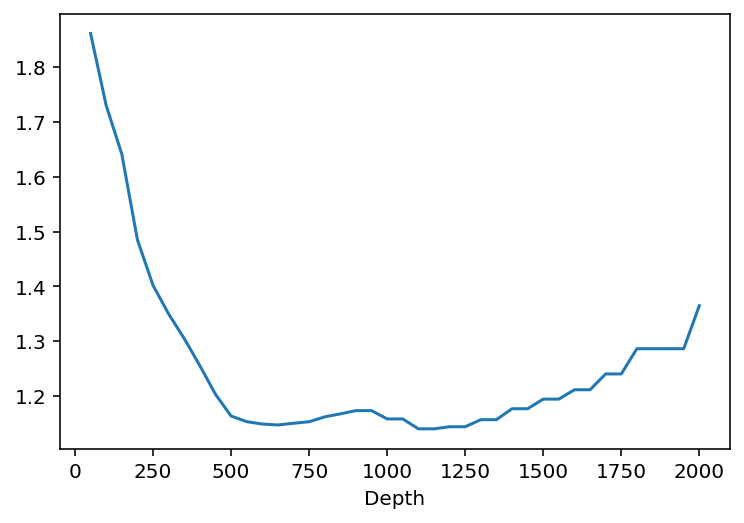

In [80]:
error_df['AE'].plot()

### 2 layer model: 5, 15

<AxesSubplot:xlabel='Depth'>

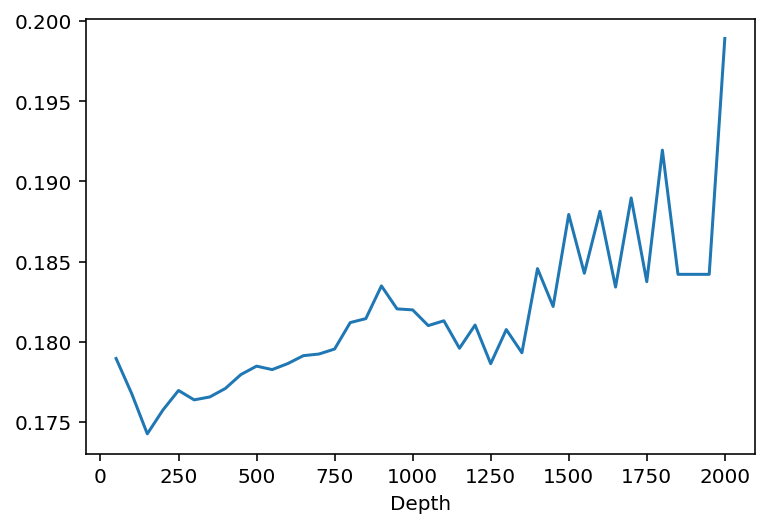

In [89]:
error_df['RMSE'].plot()

<AxesSubplot:xlabel='Depth'>

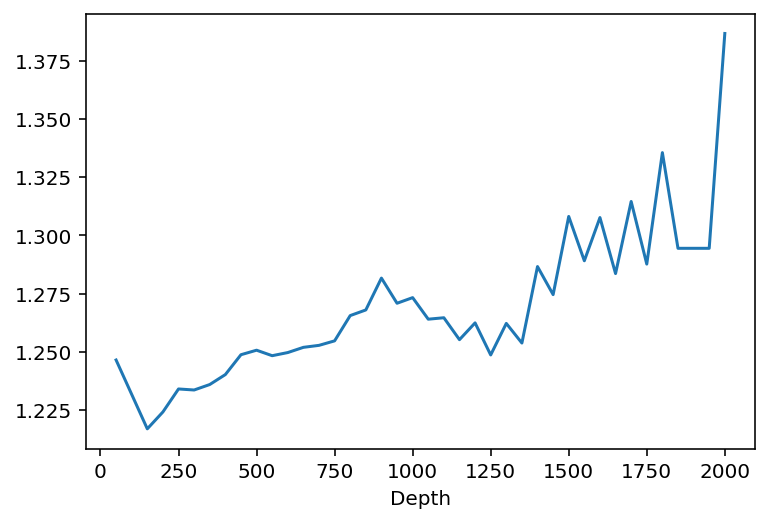

In [90]:
error_df['AE'].plot()